In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
pd.set_option('display.max_columns', None)

In [2]:
filename = "dataset_final_raw" + "_transformed.csv"
df = pd.read_csv(filename)
print(df.shape) 
df.head(5)

(215, 49)


,Unnamed: 0,t,gender,age,location,education,email,bike_usage,bike_env,bike_freq,bike_trip_length,bike_lanes_estimate,pss_traffic_high_density,pss_traffic_high_speed,pss_rail_infrastructure,pss_confusing_xsections,pss_poorly_lit,pss_road_bike_lanes,pss_separate_bike_lanes,pss_pavements,pss_entrances_exits,pss_one_way_street,pss_poor_road_conditions,pss_winter,pss_wet_roads,pss_parked_cars,rt_rule_breaking,rt_red_light_run,rt_risk_taking_alone,rt_rule_breaking_relative_risk,rt_alcohol,rt_rule_obeying_difficulty,rt_front_light,rt_back_light,rt_reflexive_apparell,rt_road_to_pavement_switch,rt_pavement_to_road_switch,rt_prefers_road,rt_subjective_faster_riding,rt_subjective_safer_riding,rt_hand_signals,hw_urban_env,hw_rural_env,hw_comfort,hw_financial_investment,hw_practical_reasons,hw_comfort_reasons,hw_aesthetic,hw_weather_influence
0,0,3/12/2021 15:22:07,Muž,20,Bratislava,stredoškolské s maturitou,alexduni9@gmail.com,Rekreáciu,mestskom,menej ako 1x za mesiac,5 - 10 km,75,2,1,3,3,4,2,5,5,4,5,5,4,4,4,5,4,4,3,2,4,2,1,2,4,2,2,2,3,3,1,2,2,1,1,4,2,0
1,1,3/15/2021 17:48:09,Muž,25,Bratislava,vysokoškolské I. stupňa (bakalárske),dan.kniebugl1@gmail.com,Transport,mestskom,5 a viac ako 5 krát za týždeň,3 - 5 km,90,2,1,2,1,3,2,4,4,2,4,2,4,4,1,4,3,4,2,5,4,5,5,2,1,5,5,2,4,5,5,5,5,1,1,1,1,1
2,2,3/15/2021 18:15:53,Muž,20,Bratislava,stredoškolské s maturitou,bolwo77@gmail.com,Šport / tréning vo vlastnom čase,mestskom,5 a viac ako 5 krát za týždeň,20 - 30 km,5,3,2,3,3,2,3,5,1,2,3,3,2,2,2,4,4,3,4,2,3,4,5,2,1,5,5,5,3,5,5,5,4,2,1,1,1,5
3,3,3/16/2021 22:34:54,Muž,36,Bratislava,vysokoškolské II. stupňa (magisterké alebo inž...,j.t.bakos@gmail.com,Transport,mestskom,5 a viac ako 5 krát za týždeň,5 - 10 km,25,2,2,3,3,3,4,5,4,3,4,3,3,3,3,4,2,3,4,4,4,5,5,3,3,2,3,4,3,4,5,5,5,1,1,1,1,1
4,4,3/16/2021 22:36:03,Muž,24,Prievidza,vysokoškolské I. stupňa (bakalárske),durta.michal@gmail.com,Transport,mestskom,5 a viac ako 5 krát za týždeň,1 - 3 km,25,2,1,2,1,2,3,5,4,2,4,2,4,4,3,4,1,3,3,4,4,4,4,2,3,4,4,1,4,5,1,1,1,1,4,4,1,1


In [13]:
df.corr()
# df[(df['bike_env'] == 'mestskom') | (df['bike_env'] == 'nedokážem zhodnotiť')].corr()['hw_urban_env']

,Unnamed: 0,age,bike_lanes_estimate,pss_traffic_high_density,pss_traffic_high_speed,pss_rail_infrastructure,pss_confusing_xsections,pss_poorly_lit,pss_road_bike_lanes,pss_separate_bike_lanes,pss_pavements,pss_entrances_exits,pss_one_way_street,pss_poor_road_conditions,pss_winter,pss_wet_roads,pss_parked_cars,rt_rule_breaking,rt_red_light_run,rt_risk_taking_alone,rt_rule_breaking_relative_risk,rt_alcohol,rt_rule_obeying_difficulty,rt_front_light,rt_back_light,rt_reflexive_apparell,rt_road_to_pavement_switch,rt_pavement_to_road_switch,rt_prefers_road,rt_subjective_faster_riding,rt_subjective_safer_riding,rt_hand_signals,hw_urban_env,hw_rural_env,hw_comfort,hw_financial_investment,hw_practical_reasons,hw_comfort_reasons,hw_aesthetic,hw_weather_influence
Unnamed: 0,1.000000,0.187333,-0.121288,0.040591,0.056530,0.052928,-0.030104,0.044951,-0.029654,-0.043320,-0.113434,-0.023917,-0.054818,0.015017,-0.049216,-0.105179,0.003664,-0.024966,0.077999,-0.017520,0.037028,-0.046355,-0.040115,-0.115377,-0.019362,0.039135,-0.056949,-0.000744,-0.121972,-0.032063,-0.013917,0.043327,-0.030589,-0.008421,-0.028209,0.004146,0.094579,0.024115,0.009189,0.100352
age,0.187333,1.000000,0.016948,-0.001567,-0.105825,-0.137202,-0.042530,-0.143031,-0.283248,-0.284027,0.112777,-0.055390,-0.008176,-0.076855,-0.108295,-0.089787,0.028778,-0.111320,-0.075354,-0.172084,-0.132078,-0.101496,-0.084693,0.033975,-0.039211,0.209818,0.198725,-0.109660,-0.219426,-0.142146,0.012515,-0.032342,0.057903,0.051428,0.063123,0.124744,-0.071420,0.037428,0.030972,0.098087
bike_lanes_estimate,-0.121288,0.016948,1.000000,-0.125367,-0.145982,-0.070580,-0.067971,-0.022100,0.037371,0.046828,0.233826,0.129054,0.032717,0.067187,0.080607,0.059589,0.014043,-0.043479,-0.159762,-0.079278,-0.072431,0.014922,-0.096895,-0.000436,0.057898,0.072429,0.200863,-0.165974,-0.119831,-0.021313,0.030951,0.126409,0.115610,0.098760,0.171953,0.080449,-0.147657,-0.148070,-0.150088,0.011220
pss_traffic_high_density,0.040591,-0.001567,-0.125367,1.000000,0.617959,0.391776,0.355014,0.282848,0.270759,0.057155,-0.123198,0.081992,0.131859,0.182216,0.238835,0.143212,0.142088,0.073528,0.212229,0.313771,0.185879,0.122409,-0.041584,-0.085688,-0.166434,-0.102595,-0.331946,0.244409,0.384486,0.430620,0.050368,0.049389,-0.042805,-0.013314,-0.075754,-0.076866,0.055204,0.051920,0.018087,0.069323
pss_traffic_high_speed,0.056530,-0.105825,-0.145982,0.617959,1.000000,0.263348,0.278967,0.188909,0.181813,-0.035540,-0.274719,0.034849,-0.031346,0.127900,0.070565,0.003981,0.091567,-0.021452,0.085290,0.120552,0.121420,0.005709,-0.190059,-0.093675,-0.106185,-0.071818,-0.314035,0.120191,0.311457,0.303250,0.081446,0.067260,-0.024548,0.001729,0.009364,0.070275,-0.085716,-0.026295,-0.078701,-0.053958
pss_rail_infrastructure,0.052928,-0.137202,-0.070580,0.391776,0.263348,1.000000,0.454606,0.386969,0.236805,0.045628,-0.022048,0.109079,0.183636,0.195060,0.216466,0.247310,0.138832,0.099789,0.092613,0.245207,0.188470,0.066421,0.004889,-0.122672,-0.055090,-0.190942,-0.295900,0.271919,0.229200,0.238326,-0.051983,0.037792,-0.025479,0.063144,0.070409,-0.026933,0.041682,0.038618,0.050536,0.154554
pss_confusing_xsections,-0.030104,-0.042530,-0.067971,0.355014,0.278967,0.454606,1.000000,0.401117,0.199116,0.013270,0.074664,0.164677,0.167564,0.298265,0.267082,0.278238,0.232394,0.092474,0.171052,0.182911,0.095436,0.008031,-0.042659,-0.118898,-0.150705,-0.149489,-0.164126,0.109826,0.215147,0.226963,-0.061390,0.006378,-0.048532,0.013415,0.006661,-0.010432,0.036209,0.085405,-0.029386,0.094298
pss_poorly_lit,0.044951,-0.143031,-0.022100,0.282848,0.188909,0.386969,0.401117,1.000000,0.347710,0.188687,-0.043146,0.119090,0.243383,0.368625,0.366018,0.438386,0.336672,0.082151,0.130205,0.227105,0.160395,0.188409,0.062043,-0.002547,0.013263,-0.029035,-0.229330,0.240400,0.301691,0.250788,0.112241,0.020821,-0.003823,0.009375,0.016880,-0.086070,-0.038445,-0.014242,-0.033746,-0.004032
pss_road_bike_lanes,-0.029654,-0.283248,0.037371,0.270759,0.181813,0.236805,0.199116,0

In [3]:
# means and medians for each of the fields

pss_cols = ['pss_traffic_high_density', 'pss_traffic_high_speed', 'pss_rail_infrastructure', 'pss_confusing_xsections', 'pss_poorly_lit', 'pss_road_bike_lanes', 'pss_separate_bike_lanes', 'pss_pavements', 'pss_entrances_exits', 'pss_one_way_street', 'pss_poor_road_conditions', 'pss_winter', 'pss_wet_roads', 'pss_parked_cars']
rt_cols = ['rt_rule_breaking', 'rt_red_light_run', 'rt_risk_taking_alone', 'rt_rule_breaking_relative_risk', 'rt_alcohol', 'rt_rule_obeying_difficulty', 'rt_front_light', 'rt_back_light', 'rt_reflexive_apparell', 'rt_road_to_pavement_switch', 'rt_pavement_to_road_switch', 'rt_prefers_road', 'rt_subjective_faster_riding', 'rt_subjective_safer_riding', 'rt_hand_signals']
hw_cols = ['hw_urban_env', 'hw_rural_env', 'hw_comfort', 'hw_financial_investment', 'hw_practical_reasons', 'hw_comfort_reasons', 'hw_aesthetic', 'hw_weather_influence']
prefixes = ["pss", "rt", "hw"]
output_cols = ['name', 'mean', 'median']

def compute_single_var_analyses(df, target_cols, general_stats_prefix_list, output_cols):
    single_field_analysis = pd.DataFrame(columns=output_cols)
    for col_name in target_cols:
        single_field_analysis = single_field_analysis.append(
            pd.Series([col_name, df[col_name].mean(), df[col_name].median()], index=output_cols),
            ignore_index=True
        )
        
    for prefix in general_stats_prefix_list:
        mask = single_field_analysis['name'].str.startswith(prefix)
        mean_ordered = single_field_analysis[mask].sort_values('mean')
        median_ordered = single_field_analysis[mask].sort_values('median')
#         print(mean_ordered)
#         print(median_ordered)
        
    return single_field_analysis

sva_df = compute_single_var_analyses(df, pss_cols + rt_cols + hw_cols, prefixes, output_cols)
sva_df.sort_values("mean")



,name,mean,median
1,pss_traffic_high_speed,1.367442,1.0
0,pss_traffic_high_density,1.800000,2.0
36,hw_weather_influence,1.851163,1.0
3,pss_confusing_xsections,1.888372,2.0
35,hw_aesthetic,2.032558,1.0
13,pss_parked_cars,2.041860,2.0
4,pss_poorly_lit,2.125581,2.0
34,hw_comfort_reasons,2.330233,2.0
10,pss_poor_road_conditions,2.358140,2.0
2,pss_rail_infrastructure,2.465116,2.0


In [15]:
field = 'hw_practical_reasons'
result = df[(df[field] != 0) & (df[field] > 3)]
percent = result.shape[0] / 214 * 100
percent

42.523364485981304

Text(0, 0.5, '# of respondents')

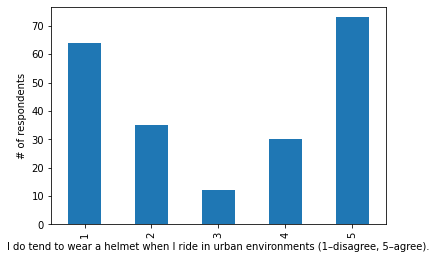

In [5]:
ax = df['hw_urban_env'].value_counts().loc[[1,2,3,4,5]].plot(kind="bar")
ax.set_xlabel("I do tend to wear a helmet when I ride in urban environments (1–disagree, 5–agree).")
ax.set_ylabel("# of respondents")
# df['hw_urban_env'].plot(kind="bar")

In [17]:
relevant_pss = ["pss_traffic_high_density", "pss_traffic_high_speed", "pss_separate_bike_lanes", "pss_road_bike_lanes"]
relevant_rt = ["rt_rule_breaking", "rt_red_light_run"]
relevant_hw = ["hw_urban_env"]

models = {
    "pss": {
        'traffic': ['pss_traffic_high_density', 'pss_traffic_high_speed'],
        'conditions': ["pss_poor_road_conditions", "pss_winter", "pss_wet_roads"],
        'dangerous': ['pss_traffic_high_density', 'pss_traffic_high_speed', 'pss_rail_infrastructure', 'pss_confusing_xsections', 'pss_poorly_lit', 'pss_entrances_exits', 'pss_one_way_street', 'pss_parked_cars']
    },
    "rt": {
        'reckless': ['rt_rule_breaking', 'rt_red_light_run', 'rt_risk_taking_alone'],
        'reckless_2': ['rt_red_light_run', 'rt_alcohol'],
        'prefers_road': ['rt_prefers_road', 'rt_pavement_to_road_switch'],
        'perceived_faster': ['rt_subjective_faster_riding'],
        'perceived_safer': ['rt_subjective_safer_riding'],
        'equipment': ['rt_front_light', 'rt_back_light']
    },
    "hw": {
        "urban": ['hw_urban_env'],
#         "lasso": 
    }
}
def get_all_custom_models(model_map):
    custom_models = []
    for category,category_models in model_map.items():
        for model_name, field_list in category_models.items():
            custom_models.append(category + "_" + model_name+"_mean")
            
    return custom_models


In [18]:

def compute_stats(df, general_stats_prefix_list, models_map):
    for prefix in general_stats_prefix_list:
        df = df.drop(columns=[prefix+"_mean"], errors='ignore')
        idx = df.columns.str.startswith(prefix)
        
        print(len(idx))
        df[prefix+"_mean"] = df.iloc[:,idx].mean(axis=1)
        
    for category,category_models in models_map.items():
        for model_name, field_list in category_models.items():
            final_col_name = category + "_" + model_name
            
            df = df.drop(columns=[final_col_name+"_mean"], errors='ignore')
            df[final_col_name+"_mean"] = df[field_list].mean(axis=1)

    return df

custom_models = get_all_custom_models(models)
print(custom_models)
stats_df = compute_stats(df, ["pss", "rt", "hw"], models)
stats_df

['pss_traffic_mean', 'pss_conditions_mean', 'pss_dangerous_mean', 'rt_reckless_mean', 'rt_reckless_2_mean', 'rt_prefers_road_mean', 'rt_perceived_faster_mean', 'rt_perceived_safer_mean', 'rt_equipment_mean', 'hw_urban_mean']
49
50
51


,Unnamed: 0,t,gender,age,location,education,email,bike_usage,bike_env,bike_freq,bike_trip_length,bike_lanes_estimate,pss_traffic_high_density,pss_traffic_high_speed,pss_rail_infrastructure,pss_confusing_xsections,pss_poorly_lit,pss_road_bike_lanes,pss_separate_bike_lanes,pss_pavements,pss_entrances_exits,pss_one_way_street,pss_poor_road_conditions,pss_winter,pss_wet_roads,pss_parked_cars,rt_rule_breaking,rt_red_light_run,rt_risk_taking_alone,rt_rule_breaking_relative_risk,rt_alcohol,rt_rule_obeying_difficulty,rt_front_light,rt_back_light,rt_reflexive_apparell,rt_road_to_pavement_switch,rt_pavement_to_road_switch,rt_prefers_road,rt_subjective_faster_riding,rt_subjective_safer_riding,rt_hand_signals,hw_urban_env,hw_rural_env,hw_comfort,hw_financial_investment,hw_practical_reasons,hw_comfort_reasons,hw_aesthetic,hw_weather_influence,pss_mean,rt_mean,hw_mean,pss_traffic_mean,pss_conditions_mean,pss_dangerous_mean,rt_reckless_mean,rt_reckless_2_mean,rt_prefers_road_mean,rt_perceived_faster_mean,rt_perceived_safer_mean,rt_equipment_mean,hw_urban_mean
0,0,3/12/2021 15:22:07,Muž,20,Bratislava,stredoškolské s maturitou,alexduni9@gmail.com,Rekreáciu,mestskom,menej ako 1x za mesiac,5 - 10 km,75,2,1,3,3,4,2,5,5,4,5,5,4,4,4,5,4,4,3,2,4,2,1,2,4,2,2,2,3,3,1,2,2,1,1,4,2,0,3.642857,2.866667,1.625,1.5,4.333333,3.250,4.333333,3.0,2.0,2.0,3.0,1.5,1.0
1,1,3/15/2021 17:48:09,Muž,25,Bratislava,vysokoškolské I. stupňa (bakalárske),dan.kniebugl1@gmail.com,Transport,mestskom,5 a viac ako 5 krát za týždeň,3 - 5 km,90,2,1,2,1,3,2,4,4,2,4,2,4,4,1,4,3,4,2,5,4,5,5,2,1,5,5,2,4,5,5,5,5,1,1,1,1,1,2.571429,3.733333,2.500,1.5,3.333333,2.000,3.666667,4.0,5.0,2.0,4.0,5.0,5.0
2,2,3/15/2021 18:15:53,Muž,20,Bratislava,stredoškolské s maturitou,bolwo77@gmail.com,Šport / tréning vo vlastnom čase,mestskom,5 a viac ako 5 krát za týždeň,20 - 30 km,5,3,2,3,3,2,3,5,1,2,3,3,2,2,2,4,4,3,4,2,3,4,5,2,1,5,5,5,3,5,5,5,4,2,1,1,1,5,2.571429,3.666667,3.000,2.5,2.333333,2.500,3.666667,3.0,5.0,5.0,3.0,4.5,5.0
3,3,3/16/2021 22:34:54,Muž,36,Bratislava,vysokoškolské II. stupňa (magisterké alebo inž...,j.t.bakos@gmail.com,Transport,mestskom,5 a viac ako 5 krát za týždeň,5 - 10 km,25,2,2,3,3,3,4,5,4,3,4,3,3,3,3,4,2,3,4,4,4,5,5,3,3,2,3,4,3,4,5,5,5,1,1,1,1,1,3.214286,3.533333,2.500,2.0,3.000000,2.875,3.000000,3.0,2.5,4.0,3.0,5.0,5.0
4,4,3/16/2021 22:36:03,Muž,24,Prievidza,vysokoškolské I. stupňa (bakalárske),durta.michal@gmail.com,Transport,mestskom,5 a viac ako 5 krát za týždeň,1 - 3 km,25,2,1,2,1,2,3,5,4,2,4,2,4,4,3,4,1,3,3,4,4,4,4,2,3,4,4,1,4,5,1,1,1,1,4,4,1,1,2.785714,3.333333,1.750,1.5,3.333333,2.125,2.666667,2.5,4.0,1.0,4.0,4.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,210,3/26/2021 9:59:09,Muž,35,Bratislava,vysokoškolské I. stupňa (bakalárske),-,Presun/dopravu,mestskom,5 a viac ako 5-krát za týždeň,5 - 10 km,20,3,1,3,2,3,4,5,5,3,3,3,4,4,2,5,5,5,5,5,3,4,4,4,2,4,2,3,3,5,2,4,3,3,4,2,1,2,3.214286,3.933333,2.625,2.0,3.666667,2.500,5.000000,5.0,3.0,3.0,3.0,4.0,2.0
211,211,3/27/2021 15:33:53,Muž,43,Bratislava,vysokoškolské II. stupňa (magisterké alebo inž...,-,Presun/dopravu,mestskom,5 a viac ako 5-krát za týždeň,10 - 20 km,15,2,1,4,2,4,2,4,3,3,3,3,3,3,3,4,4,5,4,3,2,4,5,5,2,5,3,4,4,4,5,5,4,2,1,1,1,1,2.857143,3.866667,2.500,1.5,3.000000,2.750,4.333333,3.5,4.0,4.0,4.0,4.5,5.0
212,212,3/29/2021 18:30:02,Žena,42,Bratislava,vysokoškolské II. stupňa (magisterké alebo inž...,-,Rekreáciu,nedokážem zhodnotiť,5 a viac ako 5-krát za týždeň,20 - 30 km,5,1,1,1,1,1,1,4,2,2,2,1,1,2,1,1,1,1,3,1,3,4,4,5,4,4,2,2,3,5,4,5,4,5,1,4,4,2,1.500000,2.866667,3.625,1.0,1.333333,1.250,1.000000,1.0,3.0,2.0,3.0,4.0,4.0
213,213,3/29/2021 21:51:48,Žena,48,Bratislava,vysokoškolské II. stupňa (magisterké alebo inž...,jana.pucikova@gmail.com,Presun/dopravu,mestskom,5 a viac ako 5-krát za týždeň,3 - 5 km,10,3,2,4,

In [19]:
for k,v in models.items():
    for _k, _v in v.items():
        print(", ".join(_v))

pss_traffic_high_density, pss_traffic_high_speed
pss_poor_road_conditions, pss_winter, pss_wet_roads
pss_traffic_high_density, pss_traffic_high_speed, pss_rail_infrastructure, pss_confusing_xsections, pss_poorly_lit, pss_entrances_exits, pss_one_way_street, pss_parked_cars
rt_rule_breaking, rt_red_light_run, rt_risk_taking_alone
rt_red_light_run, rt_alcohol
rt_prefers_road, rt_pavement_to_road_switch
rt_subjective_faster_riding
rt_subjective_safer_riding
rt_front_light, rt_back_light
hw_urban_env


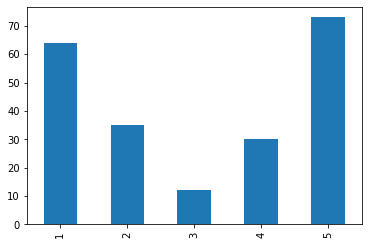

In [8]:
stats_df['hw_urban_mean'].value_counts().loc[[1,2,3,4,5]].plot(kind="bar")

In [9]:
to_plot_fields = ['pss_mean', 'rt_mean', 'hw_mean'] + get_all_custom_models(models)
to_plot_df = stats_df[to_plot_fields]
to_plot_df

,pss_mean,rt_mean,hw_mean,pss_traffic_mean,pss_conditions_mean,pss_dangerous_mean,rt_reckless_mean,rt_reckless_2_mean,rt_prefers_road_mean,rt_perceived_faster_mean,rt_perceived_safer_mean,rt_equipment_mean,hw_urban_mean
0,3.642857,2.866667,1.625,1.5,4.333333,3.250,4.333333,3.0,2.0,2.0,3.0,1.5,1.0
1,2.571429,3.733333,2.500,1.5,3.333333,2.000,3.666667,4.0,5.0,2.0,4.0,5.0,5.0
2,2.571429,3.666667,3.000,2.5,2.333333,2.500,3.666667,3.0,5.0,5.0,3.0,4.5,5.0
3,3.214286,3.533333,2.500,2.0,3.000000,2.875,3.000000,3.0,2.5,4.0,3.0,5.0,5.0
4,2.785714,3.333333,1.750,1.5,3.333333,2.125,2.666667,2.5,4.0,1.0,4.0,4.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,3.214286,3.933333,2.625,2.0,3.666667,2.500,5.000000,5.0,3.0,3.0,3.0,4.0,2.0
211,2.857143,3.866667,2.500,1.5,3.000000,2.750,4.333333,3.5,4.0,4.0,4.0,4.5,5.0
212,1.500000,2.866667,3.625,1.0,1.333333,1.250,1.000000,1.0,3.0,2.0,3.0,4.0,4.0
213,3.071429,3.066667,1.750,2.5,3.000000,2.625,4.000000,3.5,4.0,1.0,3.0,3.0,1.0


In [24]:
stats_df.corr()

,Unnamed: 0,age,bike_lanes_estimate,pss_traffic_high_density,pss_traffic_high_speed,pss_rail_infrastructure,pss_confusing_xsections,pss_poorly_lit,pss_road_bike_lanes,pss_separate_bike_lanes,pss_pavements,pss_entrances_exits,pss_one_way_street,pss_poor_road_conditions,pss_winter,pss_wet_roads,pss_parked_cars,rt_rule_breaking,rt_red_light_run,rt_risk_taking_alone,rt_rule_breaking_relative_risk,rt_alcohol,rt_rule_obeying_difficulty,rt_front_light,rt_back_light,rt_reflexive_apparell,rt_road_to_pavement_switch,rt_pavement_to_road_switch,rt_prefers_road,rt_subjective_faster_riding,rt_subjective_safer_riding,rt_hand_signals,hw_urban_env,hw_rural_env,hw_comfort,hw_financial_investment,hw_practical_reasons,hw_comfort_reasons,hw_aesthetic,hw_weather_influence,pss_mean,rt_mean,hw_mean,pss_traffic_mean,pss_conditions_mean,pss_dangerous_mean,rt_reckless_mean,rt_reckless_2_mean,rt_prefers_road_mean,rt_perceived_faster_mean,rt_perceived_safer_mean,rt_equipment_mean,hw_urban_mean
Unnamed: 0,1.000000,0.187333,-0.121288,0.040591,0.056530,0.052928,-0.030104,0.044951,-0.029654,-0.043320,-0.113434,-0.023917,-0.054818,0.015017,-0.049216,-0.105179,0.003664,-0.024966,0.077999,-0.017520,0.037028,-0.046355,-0.040115,-0.115377,-0.019362,0.039135,-0.056949,-0.000744,-0.121972,-0.032063,-0.013917,0.043327,-0.030589,-0.008421,-0.028209,0.004146,0.094579,0.024115,0.009189,0.100352,-0.038576,-0.052018,0.043156,0.052674,-0.059296,0.014741,0.018760,0.022540,-0.075877,-0.032063,-0.013917,-0.074033,-0.030589
age,0.187333,1.000000,0.016948,-0.001567,-0.105825,-0.137202,-0.042530,-0.143031,-0.283248,-0.284027,0.112777,-0.055390,-0.008176,-0.076855,-0.108295,-0.089787,0.028778,-0.111320,-0.075354,-0.172084,-0.132078,-0.101496,-0.084693,0.033975,-0.039211,0.209818,0.198725,-0.109660,-0.219426,-0.142146,0.012515,-0.032342,0.057903,0.051428,0.063123,0.124744,-0.071420,0.037428,0.030972,0.098087,-0.160135,-0.145370,0.116784,-0.051727,-0.119211,-0.100616,-0.143525,-0.111335,-0.193554,-0.142146,0.012515,-0.001897,0.057903
bike_lanes_estimate,-0.121288,0.016948,1.000000,-0.125367,-0.145982,-0.070580,-0.067971,-0.022100,0.037371,0.046828,0.233826,0.129054,0.032717,0.067187,0.080607,0.059589,0.014043,-0.043479,-0.159762,-0.079278,-0.072431,0.014922,-0.096895,-0.000436,0.057898,0.072429,0.200863,-0.165974,-0.119831,-0.021313,0.030951,0.126409,0.115610,0.098760,0.171953,0.080449,-0.147657,-0.148070,-0.150088,0.011220,0.051257,-0.068112,0.026342,-0.148967,0.090032,-0.044545,-0.119414,-0.095162,-0.161576,-0.021313,0.030951,0.030309,0.115610
pss_traffic_high_density,0.040591,-0.001567,-0.125367,1.000000,0.617959,0.391776,0.355014,0.282848,0.270759,0.057155,-0.123198,0.081992,0.131859,0.182216,0.238835,0.143212,0.142088,0.073528,0.212229,0.313771,0.185879,0.122409,-0.041584,-0.085688,-0.166434,-0.102595,-0.331946,0.244409,0.384486,0.430620,0.050368,0.049389,-0.042805,-0.013314,-0.075754,-0.076866,0.055204,0.051920,0.018087,0.069323,0.507489,0.273237,-0.012352,0.926229,0.245735,0.630755,0.246313,0.213496,0.366675,0.430620,0.050368,-0.135215,-0.042805
pss_traffic_high_speed,0.056530,-0.105825,-0.145982,0.617959,1.000000,0.263348,0.278967,0.188909,0.181813,-0.035540,-0.274719,0.034849,-0.031346,0.127900,0.070565,0.003981,0.091567,-0.021452,0.085290,0.120552,0.121420,0.005709,-0.190059,-0.093675,-0.106185,-0.071818,-0.314035,0.120191,0.311457,0.303250,0.081446,0.067260,-0.024548,0.001729,0.009364,0.070275,-0.085716,-0.026295,-0.078701,-0.053958,0.309236,0.086307,-0.053078,0.868743,0.088617,0.477597,0.077491,0.059176,0.256055,0.303250,0.081446,-0.107842,-0.024548
pss_rail_infrastructure,0.052928,-0.137202,-0.070580,0.391776,0.263348,1.000000,0.454606,0.386969,0.236805,0.045628,-0.022048,0.109079,0.183636,0.195060,0.216466,0.247310,0.138832,0.099789,0.092613,0.245207,0.188470,0.066421,0.004889,-0.122672,-0.055090,-0.190942,-0.295900,0.271919,0.229200,0.238326,-0.051983,0.037792,-0.025479,0.063144,0.070409,-0.026933,0.041682,0.038618,0.050536,0.154554,0.544846,0.155512,0.104413,0.37306

In [20]:
def render_pairgrid(to_plot_df, title, optional_vars=[]):
    v = None if len(optional_vars) == 0 else optional_vars
    
    d = sns.PairGrid(to_plot_df, vars=v)
    d = d.map_upper(plt.scatter,marker='+')
    d = d.map_lower(sns.kdeplot, cmap="hot",shade=True)
    d = d.map_diag(sns.kdeplot, shade=True)

    d.fig.subplots_adjust(top=0.9) # adjust the Figure in rp
    d.fig.suptitle(title + " (" + str(to_plot_df.shape[0]) + " data points)")

    plt.show()

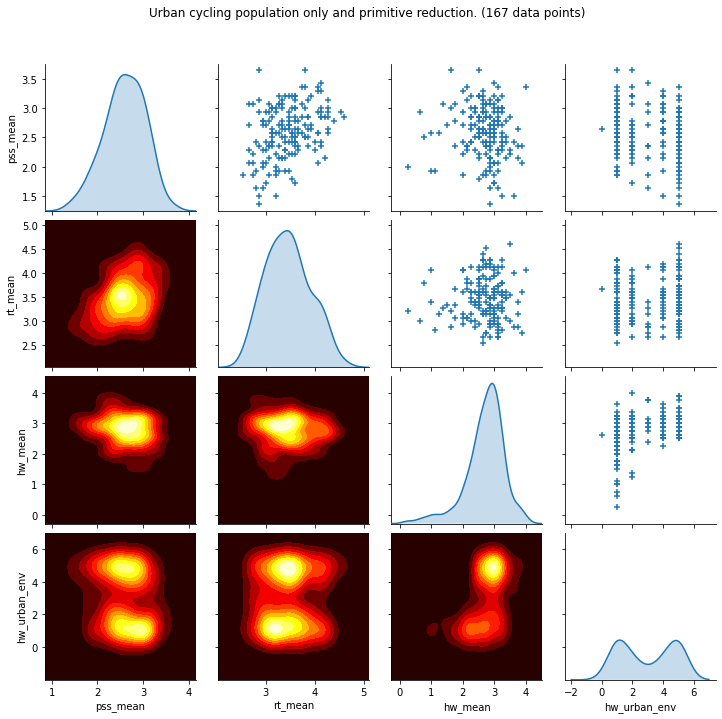

In [25]:
render_pairgrid(urban_only(stats_df), "Urban cycling population only and primitive reduction.", ['pss_mean', 'rt_mean', 'hw_mean', 'hw_urban_env'])

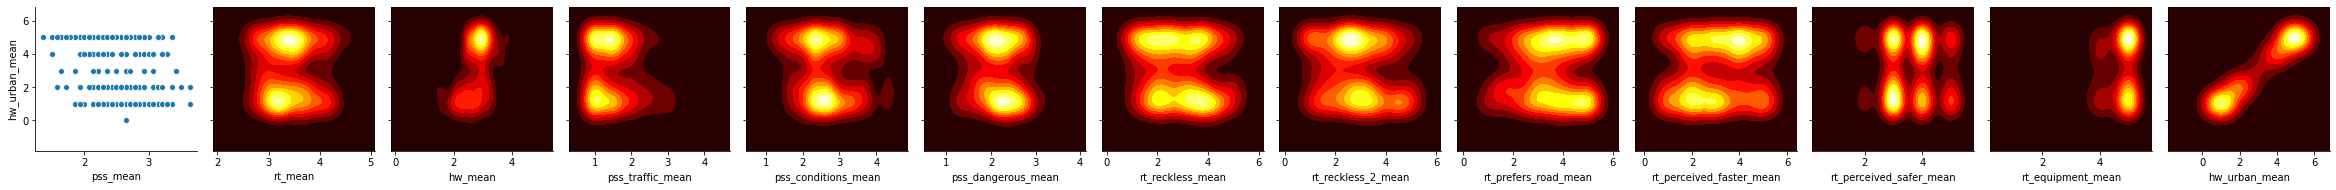

In [12]:
p = sns.pairplot(
    to_plot_df,
    x_vars=to_plot_fields,
    y_vars=["hw_urban_mean"],
)
p.map_lower(sns.kdeplot, cmap="hot", shade=True)
p.map_upper(sns.kdeplot, cmap="hot", shade=True)
plt.show()

In [ ]:
field = 'bike_env'
# filtered_df = stats_df[stats_df[field] == 'mestskom']
filtered_df = stats_df

to_plot_df = filtered_df[to_plot_fields]

render_pairgrid(to_plot_df, "Bike environment = both urban and rural, including custom models.")

In [13]:
to_plot_df['hw_urban_mean'].value_counts()

5.0    73
1.0    64
2.0    35
4.0    30
3.0    12
0.0     1
Name: hw_urban_mean, dtype: int64

In [12]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats


In [16]:
regression_df = stats_df
remove_predictors = ['hw_mean'] + hw_cols

all_possible_default_predictors = pss_cols + rt_cols

target_column = ['hw_urban_env'] 
predictors = list(set(all_possible_default_predictors)-set(target_column) - set(remove_predictors))
print(predictors)
regression_df[predictors] = regression_df[predictors]/regression_df[predictors].max()
regression_df.describe()

X = regression_df[predictors].values
y = regression_df[target_column].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=40)
print(regression_df)

['pss_winter', 'pss_wet_roads', 'rt_alcohol', 'pss_poor_road_conditions', 'pss_traffic_high_density', 'rt_pavement_to_road_switch', 'pss_road_bike_lanes', 'pss_entrances_exits', 'pss_parked_cars', 'rt_rule_breaking', 'rt_subjective_faster_riding', 'rt_rule_breaking_relative_risk', 'rt_red_light_run', 'pss_pavements', 'pss_one_way_street', 'rt_risk_taking_alone', 'rt_subjective_safer_riding', 'rt_road_to_pavement_switch', 'rt_rule_obeying_difficulty', 'pss_confusing_xsections', 'rt_back_light', 'rt_reflexive_apparell', 'pss_poorly_lit', 'pss_rail_infrastructure', 'rt_hand_signals', 'pss_traffic_high_speed', 'pss_separate_bike_lanes', 'rt_front_light', 'rt_prefers_road']
     Unnamed: 0                   t gender  age    location  \
0             0  3/12/2021 15:22:07    Muž   20  Bratislava   
1             1  3/15/2021 17:48:09    Muž   25  Bratislava   
2             2  3/15/2021 18:15:53    Muž   20  Bratislava   
3             3  3/16/2021 22:34:54    Muž   36  Bratislava   
4      

In [7]:
def lasso_optimize_r_2_through_lambda(X_train, y_train, X_test, y_test):
    lambdas, test_r_squares = [], []
    for i in range(100):
        _lambda = i / 100
        lambdas.append(_lambda)
        model_lasso = linear_model.Lasso(alpha=_lambda)
        model_lasso.fit(X_train, y_train) 
        pred_train_lasso= model_lasso.predict(X_train)

        pred_test_lasso= model_lasso.predict(X_test)
        test_r_square = r2_score(y_test, pred_test_lasso)
        test_r_squares.append(test_r_square)

    sns.lineplot(x=lambdas, y=test_r_squares)

    max_y = max(test_r_squares)  # Find the maximum y value
    max_x = lambdas[test_r_squares.index(max_y)]
    print("max y = ", max_y, " @ x =", max_x)
    
    return max_x
    


max y =  0.3836965829301098  @ x = 0.03
optimal lambda =  0.03
1.4047499834945434
0.34657233200079174
1.2611793541165046
0.3836965829301098
pss_winter  ->  -0.0
pss_wet_roads  ->  -0.0
rt_alcohol  ->  -0.0
pss_poor_road_conditions  ->  0.0
pss_traffic_high_density  ->  -0.0
rt_pavement_to_road_switch  ->  -0.0
pss_road_bike_lanes  ->  -0.0
pss_entrances_exits  ->  -0.0
pss_parked_cars  ->  -0.0
rt_rule_breaking  ->  -0.0
rt_subjective_faster_riding  ->  0.3527272131110083
rt_rule_breaking_relative_risk  ->  -0.0
rt_red_light_run  ->  -0.0
pss_pavements  ->  -0.45053978996949584
pss_one_way_street  ->  -0.32630579592429626
rt_risk_taking_alone  ->  0.0
rt_subjective_safer_riding  ->  -0.0
rt_road_to_pavement_switch  ->  0.0
rt_rule_obeying_difficulty  ->  -0.35969483477953984
pss_confusing_xsections  ->  0.0
rt_back_light  ->  -0.0
rt_reflexive_apparell  ->  3.075112425186987
pss_poorly_lit  ->  0.0
pss_rail_infrastructure  ->  0.0
rt_hand_signals  ->  0.0
pss_traffic_high_speed  ->  -0

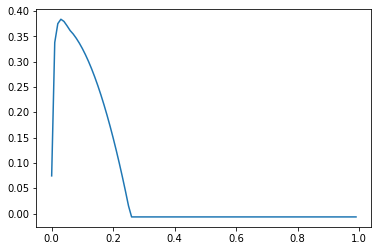

In [18]:
optimal_lambda = lasso_optimize_r_2_through_lambda(X_train, y_train, X_test, y_test)
print("optimal lambda = ", optimal_lambda)

model_lasso = linear_model.Lasso(alpha=optimal_lambda)
model_lasso.fit(X_train, y_train) 
pred_train_lasso= model_lasso.predict(X_train)

print(np.sqrt(mean_squared_error(y_train,pred_train_lasso)))
print(r2_score(y_train, pred_train_lasso))

pred_test_lasso= model_lasso.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_lasso))) 
print(r2_score(y_test, pred_test_lasso))

for i in range(len(predictors)):
    print(predictors[i], " -> ", model_lasso.coef_[i])
    


In [19]:
vars(model_lasso)

{'alpha': 0.03,
 'l1_ratio': 1.0,
 'fit_intercept': True,
 'normalize': False,
 'precompute': False,
 'max_iter': 1000,
 'copy_X': True,
 'tol': 0.0001,
 'warm_start': False,
 'positive': False,
 'random_state': None,
 'selection': 'cyclic',
 'n_features_in_': 29,
 'n_iter_': 8,
 'coef_': array([-0.        , -0.        , -0.        ,  0.        , -0.        ,
        -0.        , -0.        , -0.        , -0.        , -0.        ,
         0.35272721, -0.        , -0.        , -0.45053979, -0.3263058 ,
         0.        , -0.        ,  0.        , -0.35969483,  0.        ,
        -0.        ,  3.07511243,  0.        ,  0.        ,  0.        ,
        -0.        , -0.        , -0.        ,  0.        ]),
 'dual_gap_': 0.0002405927684208109,
 'intercept_': array([1.60252994])}

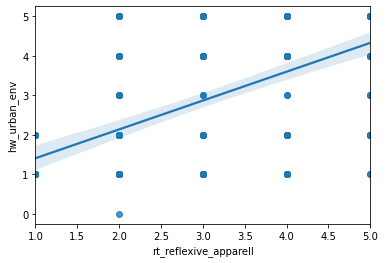

In [20]:
sns.regplot(x="rt_reflexive_apparell", y="hw_urban_env", data=df)

In [23]:
def plt_lin_reg(df, x, y):
    slope, intercept, r_value, pv, se = stats.linregress(df[x],df[y])

    sns.regplot(x=x, y=y, data=df
      , label="y={0:.1f}x+{1:.1f}".format(slope, intercept)).legend(loc="best")
    print("r^2=", r_value**2)
    print("p value=", pv)
    print("slope=", slope)
    print('intercept', intercept)
    
def urban_only(df):
    return df[(df['bike_env'] == 'mestskom') | (df['bike_env'] == 'nedokážem zhodnotiť')]
    

r^2= 0.004446805989310469
p value= 0.3304695539246276
slope= -0.09367481366407372
intercept 2.9754591098498655


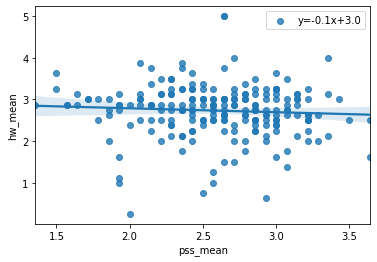

In [22]:
plt_lin_reg(stats_df, "pss_mean", "hw_mean")

r^2= 0.0007312409751432374
p value= 0.6933843610677992
slope= -0.17312590879270148


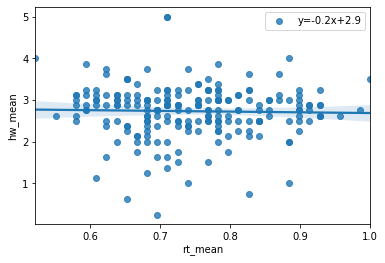

In [168]:
plt_lin_reg(stats_df, "rt_mean", "hw_mean")

r^2= 0.3316163505502498
p value= 2.1786683173381483e-20
slope= 0.7293867652708399
intercept 0.6819415097963932


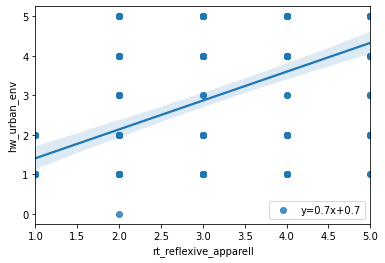

In [209]:
plt_lin_reg(stats_df, "rt_reflexive_apparell", "hw_urban_env")

r^2= 0.01953733205146691
p value= 0.04059591354991649
slope= 0.18353417799912286
intercept 2.4805434417980536


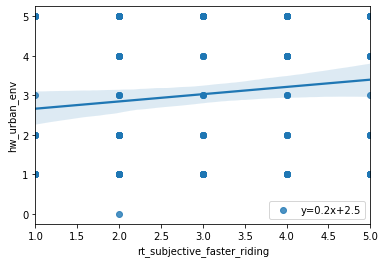

In [232]:
plt_lin_reg(stats_df, "rt_subjective_faster_riding", "hw_urban_env")

r^2= 0.0014336912251428544
p value= 0.5808398212325139
slope= 0.07425742574257384
intercept 2.779184895233711


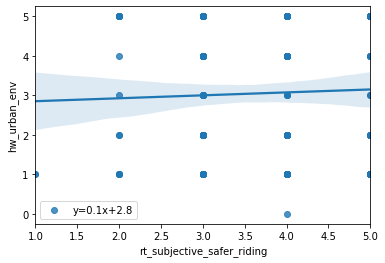

In [233]:
plt_lin_reg(stats_df, "rt_subjective_safer_riding", "hw_urban_env")

49
50
51
r^2= 0.037052170573409864
p value= 0.004618085792498679
slope= -0.7377388436797211
intercept 4.959485606285789


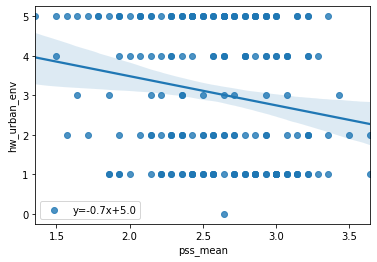

In [236]:
stats_df = compute_stats(df, ["pss", "rt", "hw"], models)
plt_lin_reg(stats_df, "pss_mean", "hw_urban_env")


r^2= 0.03554872622466832
p value= 0.005547476510307637
slope= -0.36939162405928644
intercept 4.147814097776756


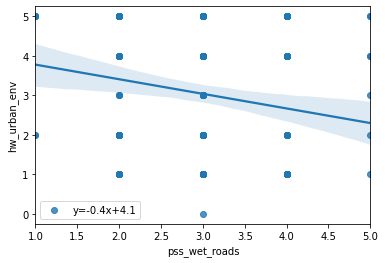

In [238]:
plt_lin_reg(stats_df, "pss_wet_roads", "hw_urban_env")


r^2= 0.04074614524467066
p value= 0.002946996322582124
slope= -1.6430016261452434
intercept 4.067465196525602


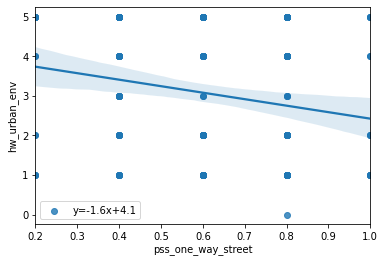

In [25]:
plt_lin_reg(stats_df, "pss_one_way_street", "hw_urban_env")

r^2= 0.12143805125463947
p value= 1.5604965009140282e-07
slope= 0.431340872374798
intercept 0.40775444264943445


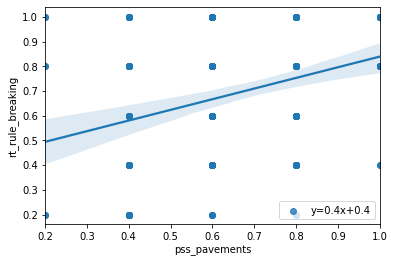

In [23]:
plt_lin_reg(stats_df, "pss_pavements", "rt_rule_breaking")

r^2= 0.038015128666325775
p value= 0.004107085957407768
slope= -1.3382406859012395
intercept 3.910454917223684


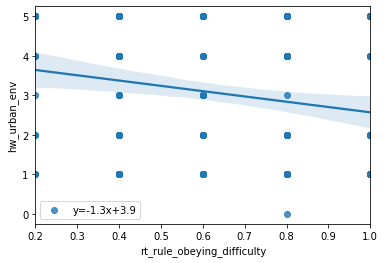

In [29]:
plt_lin_reg(stats_df, "rt_rule_obeying_difficulty", "hw_urban_env")

r^2= 0.10273712723637413
p value= 1.5892052878867975e-06
slope= 0.3235105744586582
intercept 2.584075293361076


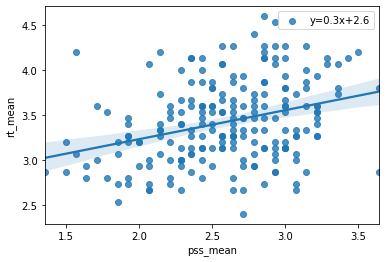

In [13]:
plt_lin_reg(stats_df, "pss_mean", "rt_mean")

r^2= 0.08214146236826556
p value= 1.9740611089195956e-05
slope= 0.16731031311165562
intercept 0.18290465321047422


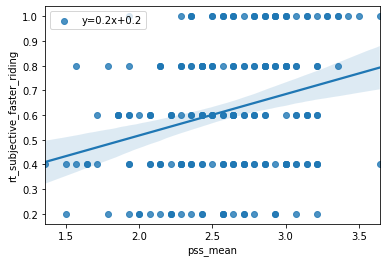

In [37]:
plt_lin_reg(stats_df, "pss_mean", "rt_subjective_faster_riding")

r^2= 0.019537332051466967
p value= 0.04059591354991621
slope= 0.9176708899956169
intercept 2.4805434417980523


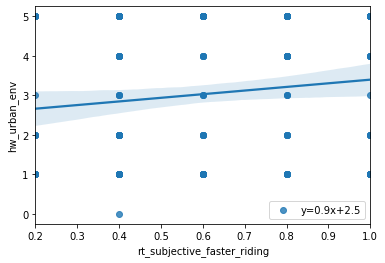

In [38]:
plt_lin_reg(stats_df, "rt_subjective_faster_riding", "hw_urban_env")

r^2= 0.035093979931225504
p value= 0.005864265456264615
slope= -1.275389866252289
intercept 3.9268272379155333


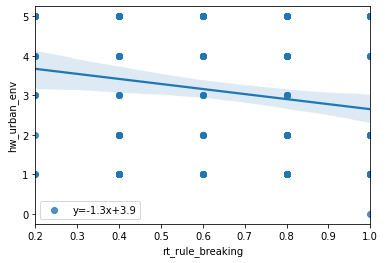

In [43]:
plt_lin_reg(stats_df, "rt_rule_breaking", "hw_urban_env")

r^2= 0.038015128666325775
p value= 0.004107085957407768
slope= -1.3382406859012395
intercept 3.910454917223684


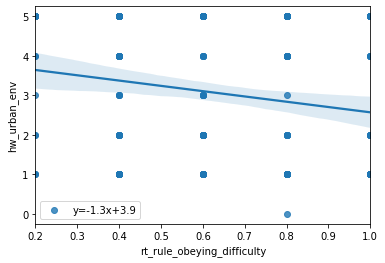

In [44]:
plt_lin_reg(stats_df, "rt_rule_obeying_difficulty", "hw_urban_env")

In [41]:
stats_df

,Unnamed: 0,t,gender,age,location,education,email,bike_usage,bike_env,bike_freq,bike_trip_length,bike_lanes_estimate,pss_traffic_high_density,pss_traffic_high_speed,pss_rail_infrastructure,pss_confusing_xsections,pss_poorly_lit,pss_road_bike_lanes,pss_separate_bike_lanes,pss_pavements,pss_entrances_exits,pss_one_way_street,pss_poor_road_conditions,pss_winter,pss_wet_roads,pss_parked_cars,rt_rule_breaking,rt_red_light_run,rt_risk_taking_alone,rt_rule_breaking_relative_risk,rt_alcohol,rt_rule_obeying_difficulty,rt_front_light,rt_back_light,rt_reflexive_apparell,rt_road_to_pavement_switch,rt_pavement_to_road_switch,rt_prefers_road,rt_subjective_faster_riding,rt_subjective_safer_riding,rt_hand_signals,hw_urban_env,hw_rural_env,hw_comfort,hw_financial_investment,hw_practical_reasons,hw_comfort_reasons,hw_aesthetic,hw_weather_influence,pss_mean,rt_mean,hw_mean,pss_traffic_mean,pss_conditions_mean,pss_dangerous_mean,rt_reckless_mean,rt_reckless_2_mean,rt_prefers_road_mean,rt_perceived_faster_mean,rt_perceived_safer_mean,rt_equipment_mean,hw_urban_mean
0,0,3/12/2021 15:22:07,Muž,20,Bratislava,stredoškolské s maturitou,alexduni9@gmail.com,Rekreáciu,mestskom,menej ako 1x za mesiac,5 - 10 km,75,0.4,0.25,0.6,0.6,1.00,0.4,1.0,1.0,0.8,1.0,1.0,0.8,0.8,0.8,1.0,0.8,0.8,0.6,0.4,0.8,0.4,0.2,0.4,0.8,0.4,0.4,0.4,0.6,0.6,1,2,2,1,1,4,2,0,3.642857,2.866667,1.625,1.5,4.333333,3.250,4.333333,3.0,2.0,2.0,3.0,1.5,1.0
1,1,3/15/2021 17:48:09,Muž,25,Bratislava,vysokoškolské I. stupňa (bakalárske),dan.kniebugl1@gmail.com,Transport,mestskom,5 a viac ako 5 krát za týždeň,3 - 5 km,90,0.4,0.25,0.4,0.2,0.75,0.4,0.8,0.8,0.4,0.8,0.4,0.8,0.8,0.2,0.8,0.6,0.8,0.4,1.0,0.8,1.0,1.0,0.4,0.2,1.0,1.0,0.4,0.8,1.0,5,5,5,1,1,1,1,1,2.571429,3.733333,2.500,1.5,3.333333,2.000,3.666667,4.0,5.0,2.0,4.0,5.0,5.0
2,2,3/15/2021 18:15:53,Muž,20,Bratislava,stredoškolské s maturitou,bolwo77@gmail.com,Šport / tréning vo vlastnom čase,mestskom,5 a viac ako 5 krát za týždeň,20 - 30 km,5,0.6,0.50,0.6,0.6,0.50,0.6,1.0,0.2,0.4,0.6,0.6,0.4,0.4,0.4,0.8,0.8,0.6,0.8,0.4,0.6,0.8,1.0,0.4,0.2,1.0,1.0,1.0,0.6,1.0,5,5,4,2,1,1,1,5,2.571429,3.666667,3.000,2.5,2.333333,2.500,3.666667,3.0,5.0,5.0,3.0,4.5,5.0
3,3,3/16/2021 22:34:54,Muž,36,Bratislava,vysokoškolské II. stupňa (magisterké alebo inž...,j.t.bakos@gmail.com,Transport,mestskom,5 a viac ako 5 krát za týždeň,5 - 10 km,25,0.4,0.50,0.6,0.6,0.75,0.8,1.0,0.8,0.6,0.8,0.6,0.6,0.6,0.6,0.8,0.4,0.6,0.8,0.8,0.8,1.0,1.0,0.6,0.6,0.4,0.6,0.8,0.6,0.8,5,5,5,1,1,1,1,1,3.214286,3.533333,2.500,2.0,3.000000,2.875,3.000000,3.0,2.5,4.0,3.0,5.0,5.0
4,4,3/16/2021 22:36:03,Muž,24,Prievidza,vysokoškolské I. stupňa (bakalárske),durta.michal@gmail.com,Transport,mestskom,5 a viac ako 5 krát za týždeň,1 - 3 km,25,0.4,0.25,0.4,0.2,0.50,0.6,1.0,0.8,0.4,0.8,0.4,0.8,0.8,0.6,0.8,0.2,0.6,0.6,0.8,0.8,0.8,0.8,0.4,0.6,0.8,0.8,0.2,0.8,1.0,1,1,1,1,4,4,1,1,2.785714,3.333333,1.750,1.5,3.333333,2.125,2.666667,2.5,4.0,1.0,4.0,4.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,210,3/26/2021 9:59:09,Muž,35,Bratislava,vysokoškolské I. stupňa (bakalárske),-,Presun/dopravu,mestskom,5 a viac ako 5-krát za týždeň,5 - 10 km,20,0.6,0.25,0.6,0.4,0.75,0.8,1.0,1.0,0.6,0.6,0.6,0.8,0.8,0.4,1.0,1.0,1.0,1.0,1.0,0.6,0.8,0.8,0.8,0.4,0.8,0.4,0.6,0.6,1.0,2,4,3,3,4,2,1,2,3.214286,3.933333,2.625,2.0,3.666667,2.500,5.000000,5.0,3.0,3.0,3.0,4.0,2.0
211,211,3/27/2021 15:33:53,Muž,43,Bratislava,vysokoškolské II. stupňa (magisterké alebo inž...,-,Presun/dopravu,mestskom,5 a viac ako 5-krát za týždeň,10 - 20 km,15,0.4,0.25,0.8,0.4,1.00,0.4,0.8,0.6,0.6,0.6,0.6,0.6,0.6,0.6,0.8,0.8,1.0,0.8,0.6,0.4,0.8,1.0,1.0,0.4,1.0,0.6,0.8,0.8,0.8,5,5,4,2,1,1,1,1,2.857143,3.866667,2.500,1.5,3.000000,2.750,4.333333,3.5,4.0,4.0,4.0,4.5,5.0
212,212,3/29/2021 18:30:02,Žena,42,Bratislava,vysokoškolské II. stupňa (magisterké alebo inž.

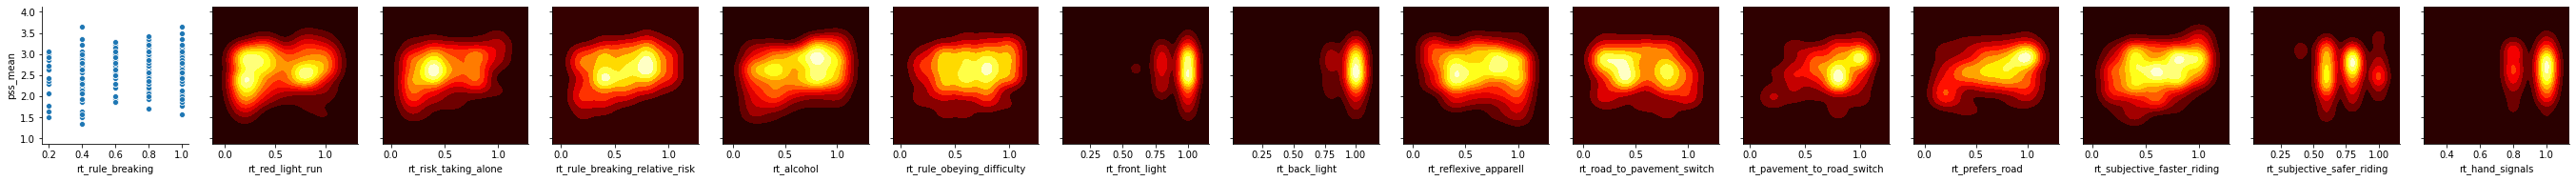

In [36]:
to_plot_fields = rt_cols
p = sns.pairplot(
    stats_df,
    x_vars=to_plot_fields,
    y_vars=["pss_mean"],
)
p.map_lower(sns.kdeplot, cmap="hot", shade=True)
p.map_upper(sns.kdeplot, cmap="hot", shade=True)
plt.show()

max y =  0.38369636723366185  @ x = 0.03


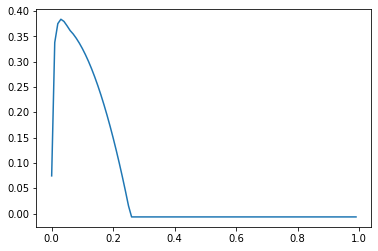

In [188]:

lambdas, test_r_squares = [], []
for i in range(100):
    _lambda = i / 100
    lambdas.append(_lambda)
    model_lasso = linear_model.Lasso(alpha=_lambda)
    model_lasso.fit(X_train, y_train) 
    pred_train_lasso= model_lasso.predict(X_train)

    pred_test_lasso= model_lasso.predict(X_test)
    test_r_square = r2_score(y_test, pred_test_lasso)
    test_r_squares.append(test_r_square)

sns.lineplot(x=lambdas, y=test_r_squares)

max_y = max(test_r_squares)  # Find the maximum y value
max_x = lambdas[test_r_squares.index(max_y)]
print("max y = ", max_y, " @ x =", max_x)
    

In [246]:
stats_df[(stats_df['hw_urban_env'] < 3)].corr()['hw_urban_env']

Unnamed: 0                        0.136056
age                               0.181915
bike_lanes_estimate               0.072719
pss_traffic_high_density          0.090087
pss_traffic_high_speed            0.063748
pss_rail_infrastructure           0.023052
pss_confusing_xsections          -0.006515
pss_poorly_lit                   -0.188793
pss_road_bike_lanes              -0.057593
pss_separate_bike_lanes          -0.238756
pss_pavements                    -0.032385
pss_entrances_exits               0.033940
pss_one_way_street               -0.143133
pss_poor_road_conditions          0.137881
pss_winter                       -0.023965
pss_wet_roads                    -0.265041
pss_parked_cars                  -0.147540
rt_rule_breaking                 -0.080222
rt_red_light_run                 -0.123770
rt_risk_taking_alone             -0.011962
rt_rule_breaking_relative_risk   -0.078225
rt_alcohol                        0.022300
rt_rule_obeying_difficulty       -0.145478
rt_front_li

In [30]:
stats_df

,Unnamed: 0,t,gender,age,location,education,email,bike_usage,bike_env,bike_freq,bike_trip_length,bike_lanes_estimate,pss_traffic_high_density,pss_traffic_high_speed,pss_rail_infrastructure,pss_confusing_xsections,pss_poorly_lit,pss_road_bike_lanes,pss_separate_bike_lanes,pss_pavements,pss_entrances_exits,pss_one_way_street,pss_poor_road_conditions,pss_winter,pss_wet_roads,pss_parked_cars,rt_rule_breaking,rt_red_light_run,rt_risk_taking_alone,rt_rule_breaking_relative_risk,rt_alcohol,rt_rule_obeying_difficulty,rt_front_light,rt_back_light,rt_reflexive_apparell,rt_road_to_pavement_switch,rt_pavement_to_road_switch,rt_prefers_road,rt_subjective_faster_riding,rt_subjective_safer_riding,rt_hand_signals,hw_urban_env,hw_rural_env,hw_comfort,hw_financial_investment,hw_practical_reasons,hw_comfort_reasons,hw_aesthetic,hw_weather_influence,pss_mean,rt_mean,hw_mean,pss_traffic_mean,pss_conditions_mean,pss_dangerous_mean,rt_reckless_mean,rt_reckless_2_mean,rt_prefers_road_mean,rt_perceived_faster_mean,rt_perceived_safer_mean,rt_equipment_mean,hw_urban_mean
0,0,3/12/2021 15:22:07,Muž,20,Bratislava,stredoškolské s maturitou,alexduni9@gmail.com,Rekreáciu,mestskom,menej ako 1x za mesiac,5 - 10 km,75,0.4,0.25,0.6,0.6,1.00,0.4,1.0,1.0,0.8,1.0,1.0,0.8,0.8,0.8,1.0,0.8,0.8,0.6,0.4,0.8,0.4,0.2,0.4,0.8,0.4,0.4,0.4,0.6,0.6,1,2,2,1,1,4,2,0,3.642857,2.866667,1.625,1.5,4.333333,3.250,4.333333,3.0,2.0,2.0,3.0,1.5,1.0
1,1,3/15/2021 17:48:09,Muž,25,Bratislava,vysokoškolské I. stupňa (bakalárske),dan.kniebugl1@gmail.com,Transport,mestskom,5 a viac ako 5 krát za týždeň,3 - 5 km,90,0.4,0.25,0.4,0.2,0.75,0.4,0.8,0.8,0.4,0.8,0.4,0.8,0.8,0.2,0.8,0.6,0.8,0.4,1.0,0.8,1.0,1.0,0.4,0.2,1.0,1.0,0.4,0.8,1.0,5,5,5,1,1,1,1,1,2.571429,3.733333,2.500,1.5,3.333333,2.000,3.666667,4.0,5.0,2.0,4.0,5.0,5.0
2,2,3/15/2021 18:15:53,Muž,20,Bratislava,stredoškolské s maturitou,bolwo77@gmail.com,Šport / tréning vo vlastnom čase,mestskom,5 a viac ako 5 krát za týždeň,20 - 30 km,5,0.6,0.50,0.6,0.6,0.50,0.6,1.0,0.2,0.4,0.6,0.6,0.4,0.4,0.4,0.8,0.8,0.6,0.8,0.4,0.6,0.8,1.0,0.4,0.2,1.0,1.0,1.0,0.6,1.0,5,5,4,2,1,1,1,5,2.571429,3.666667,3.000,2.5,2.333333,2.500,3.666667,3.0,5.0,5.0,3.0,4.5,5.0
3,3,3/16/2021 22:34:54,Muž,36,Bratislava,vysokoškolské II. stupňa (magisterké alebo inž...,j.t.bakos@gmail.com,Transport,mestskom,5 a viac ako 5 krát za týždeň,5 - 10 km,25,0.4,0.50,0.6,0.6,0.75,0.8,1.0,0.8,0.6,0.8,0.6,0.6,0.6,0.6,0.8,0.4,0.6,0.8,0.8,0.8,1.0,1.0,0.6,0.6,0.4,0.6,0.8,0.6,0.8,5,5,5,1,1,1,1,1,3.214286,3.533333,2.500,2.0,3.000000,2.875,3.000000,3.0,2.5,4.0,3.0,5.0,5.0
4,4,3/16/2021 22:36:03,Muž,24,Prievidza,vysokoškolské I. stupňa (bakalárske),durta.michal@gmail.com,Transport,mestskom,5 a viac ako 5 krát za týždeň,1 - 3 km,25,0.4,0.25,0.4,0.2,0.50,0.6,1.0,0.8,0.4,0.8,0.4,0.8,0.8,0.6,0.8,0.2,0.6,0.6,0.8,0.8,0.8,0.8,0.4,0.6,0.8,0.8,0.2,0.8,1.0,1,1,1,1,4,4,1,1,2.785714,3.333333,1.750,1.5,3.333333,2.125,2.666667,2.5,4.0,1.0,4.0,4.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,210,3/26/2021 9:59:09,Muž,35,Bratislava,vysokoškolské I. stupňa (bakalárske),-,Presun/dopravu,mestskom,5 a viac ako 5-krát za týždeň,5 - 10 km,20,0.6,0.25,0.6,0.4,0.75,0.8,1.0,1.0,0.6,0.6,0.6,0.8,0.8,0.4,1.0,1.0,1.0,1.0,1.0,0.6,0.8,0.8,0.8,0.4,0.8,0.4,0.6,0.6,1.0,2,4,3,3,4,2,1,2,3.214286,3.933333,2.625,2.0,3.666667,2.500,5.000000,5.0,3.0,3.0,3.0,4.0,2.0
211,211,3/27/2021 15:33:53,Muž,43,Bratislava,vysokoškolské II. stupňa (magisterké alebo inž...,-,Presun/dopravu,mestskom,5 a viac ako 5-krát za týždeň,10 - 20 km,15,0.4,0.25,0.8,0.4,1.00,0.4,0.8,0.6,0.6,0.6,0.6,0.6,0.6,0.6,0.8,0.8,1.0,0.8,0.6,0.4,0.8,1.0,1.0,0.4,1.0,0.6,0.8,0.8,0.8,5,5,4,2,1,1,1,1,2.857143,3.866667,2.500,1.5,3.000000,2.750,4.333333,3.5,4.0,4.0,4.0,4.5,5.0
212,212,3/29/2021 18:30:02,Žena,42,Bratislava,vysokoškolské II. stupňa (magisterké alebo inž.